### Data Dictionary

- Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

- The data set includes information about:

    + Customers who left within the last month – the column is called Churn
    + Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
    + Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
    + Demographic info about customers – gender, age range, and if they have partners and dependents

- The “Churn” column is our target.

### Import Data

In [179]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [180]:
customer = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [181]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- For predicting churn, I think potentially unnecessary columns:
    + Customer ID: As a unique identifier, this column is irrelevant for prediction because it doesn't hold any thing customer behaviour information

In [182]:
customer.drop(['customerID'], axis= 1, inplace= True)

- A thing you can see that the column "MonthlyCharges", its dtype is float64. But the column "TotalCharges", its dtype is object. It's really unobvious and so weird so I need to convert the dtype of column "TotalCharges" to float64

In [183]:
"""pd.to_numeric(customer.TotalCharges) this line code will report error because TotalCharges column you can 
check value is null or not (because its dtype is object not float or int to can be checked null values). So we need to find those null values by finding 
values = ' ' means empty values"""

# empty_totalcharges_count = len(customer[customer['TotalCharges'] == ' '])
# empty_totalcharges_count

"pd.to_numeric(customer.TotalCharges) this line code will report error because TotalCharges column you can \ncheck value is null or not (because its dtype is object not float or int to can be checked null values). So we need to find those null values by finding \nvalues = ' ' means empty values"

In [184]:
customer.shape

(7043, 20)

- So you can see there are 11 rows is null values in TotalCharges, I will drop those null values.It's not matter because my dataset is quite big 11 null row values is not matter to drop

In [185]:
customer_handle_totalcharges = customer[customer['TotalCharges'] != ' ']

In [186]:
customer_handle_totalcharges.shape

(7032, 20)

In [187]:
pd.to_numeric(customer_handle_totalcharges['TotalCharges'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [188]:
customer_handle_totalcharges.TotalCharges = pd.to_numeric(customer_handle_totalcharges['TotalCharges'])

C:\Users\ngmin\AppData\Local\Temp\ipykernel_6880\3867052433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_handle_totalcharges.TotalCharges = pd.to_numeric(customer_handle_totalcharges['TotalCharges'])


### EDA 

- The tenure column (month) is used to see how long the customer has been subscribed to the package, or in other words, how long they have been with your company.

I will plot the histogram to see the distribution of Tenure by Churn Status 

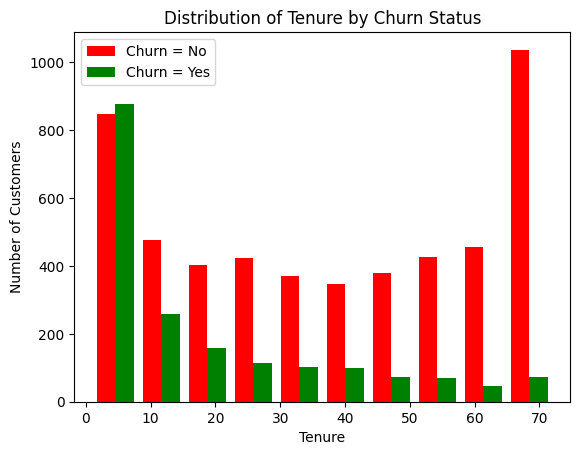

In [189]:
## Way 1: Using matplotlib to plot
tenure_churn_no = customer_handle_totalcharges[customer_handle_totalcharges['Churn'] == 'No'].tenure
tenure_churn_yes = customer_handle_totalcharges[customer_handle_totalcharges['Churn'] == 'Yes'].tenure

plt.hist([tenure_churn_no, tenure_churn_yes], color= ['red', 'green'], label= ['Churn = No', 'Churn = Yes'])
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Distribution of Tenure by Churn Status')
plt.legend()

## Way 2: Using seaborn to plot
# tenure_data = customer_handle_totalcharges[['tenure', 'Churn']]

# sns.histplot(tenure_data, x = 'tenure', hue = 'Churn', multiple='stack', palette= {'No': 'red', 'Yes': 'green'})
# plt.xlabel('Tenure')
# plt.ylabel('Churn')
# plt.title('Distribution of Tenure by Churn Status')
# plt.legend(title = 'Churn')
# plt.show()

- You can see that:
Customers with the low tunure (< 10 months) have high churn (yes) rate. Maybe those new customers have unsuitable with the service
But when the tunure increases, the number of customers who churn decrease, particularly for customers with tenure closer to the maximum (around 70 months).

-> This indicates that longer-tenured customers are more loyal and less likely to leave

Next, I will plot histogram to see the distribution of MonthlyCharges by Churn

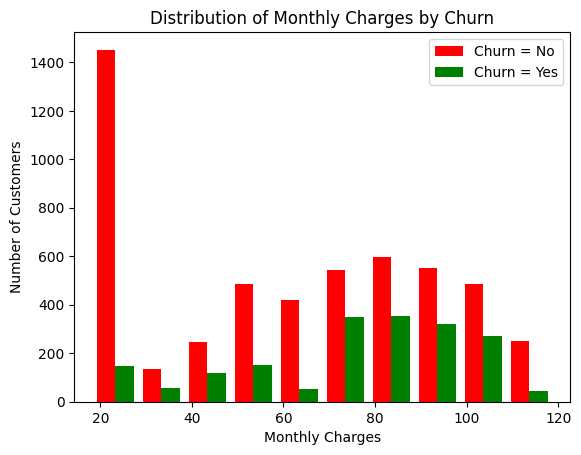

In [190]:
monthlycharges_churn_no = customer_handle_totalcharges[customer_handle_totalcharges['Churn'] == 'No'].MonthlyCharges
monthlycharges_churn_yes = customer_handle_totalcharges[customer_handle_totalcharges['Churn'] == 'Yes'].MonthlyCharges

plt.hist([monthlycharges_churn_no, monthlycharges_churn_yes], color = ['red', 'green'], label= ['Churn = No', 'Churn = Yes'])
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Distribution of Monthly Charges by Churn')
plt.legend()

- Overall, you can see that this company has numbers of customers who are loyal to the company that they subscribed. With 2 histogram above, I consider that customers who loyal to the service of company are higher than who leave the service

### Feature Engineering

- I will replace those attributes have "No phone service" or "No internet service" to "No" to be easy for labeling

In [191]:
def print_no(df):
    for cols in customer_handle_totalcharges:
        print(f'{cols} : {customer_handle_totalcharges[cols].unique()}')

In [192]:
print_no(customer_handle_totalcharges)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [193]:
customer_handle_totalcharges.replace('No internet service', 'No', inplace= True)
customer_handle_totalcharges.replace('No phone service', 'No', inplace= True)

C:\Users\ngmin\AppData\Local\Temp\ipykernel_6880\4009087752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_handle_totalcharges.replace('No internet service', 'No', inplace= True)
C:\Users\ngmin\AppData\Local\Temp\ipykernel_6880\4009087752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_handle_totalcharges.replace('No phone service', 'No', inplace= True)


In [194]:
print_no(customer_handle_totalcharges)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


- I start to label those columns have 2 different attributes "Yes" , "No" and "Male", "Female"

In [195]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for cols in yes_no_columns:
    customer_handle_totalcharges[cols].replace({'Yes': 1, "No": 0}, inplace= True)

C:\Users\ngmin\AppData\Local\Temp\ipykernel_6880\2012733415.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_handle_totalcharges[cols].replace({'Yes': 1, "No": 0}, inplace= True)
C:\Users\ngmin\AppData\Local\Temp\ipykernel_6880\2012733415.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

In [196]:
print_no(customer_handle_totalcharges)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [197]:
customer_handle_totalcharges['gender'].replace({"Female": 0, "Male": 1}, inplace= True)

C:\Users\ngmin\AppData\Local\Temp\ipykernel_6880\389778583.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_handle_totalcharges['gender'].replace({"Female": 0, "Male": 1}, inplace= True)
C:\Users\ngmin\AppData\Local\Temp\ipykernel_6880\389778583.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting',

In [198]:
print_no(customer_handle_totalcharges)

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


- Now, I will use One Hot Encoding method to convert those columns have more than 2 different attributes, particularly "InternetService", "Contract", and "PaymentMethod"

In [199]:
df_after_encode = pd.get_dummies(data= customer_handle_totalcharges, columns=['InternetService','Contract','PaymentMethod'])
df_after_encode = df_after_encode.astype(int) # Chuyển lại về dạng False là 0, True là 1
df_after_encode.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [200]:
df_after_encode.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


- Then, I will scailing columns "tenure", "MonthlyCharges", "TotalCharges" to about (0, 1)

In [201]:
from sklearn.preprocessing import MinMaxScaler

# Các cột cần scail
cols_to_scail = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Khởi tạo Min-max Scailing
scaler = MinMaxScaler()

# Thực hiện scailing 
df_after_encode[cols_to_scail] = scaler.fit_transform(df_after_encode[cols_to_scail])

In [202]:
df_after_encode.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_T

In [203]:
df_final = df_after_encode.copy()

### Spliting the dataset

In [204]:
X = df_final.drop(['Churn'], axis= 1)
y = df_final['Churn']

In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [206]:
len(X_train)

5625

In [207]:
len(X_test)

1407

In [208]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6030,0,0,0,0,0.591549,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
3410,1,0,0,0,0.028169,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
5483,0,0,1,0,0.760563,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
5524,1,0,1,1,0.619718,1,0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
6337,0,0,1,1,0.760563,1,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1
5284,0,1,0,0,0.056338,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,1,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
6741,0,0,0,0,0.154930,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
5931,1,1,1,0,0.169014,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
6766,1,0,1,1,0.183099,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


### Build a model (ANN) in tensorflow/keras

In [209]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(26, input_shape= (26,), activation= 'relu'),
    keras.layers.Dense(15, activation= 'relu'),
    keras.layers.Dense(1, activation= 'sigmoid'),
])

model.compile(optimizer= 'adam',
              loss= 'binary_crossentropy',
              metrics= ['accuracy'])

model.fit(X_train, y_train, epochs= 100)

Epoch 1/100


d:\Python Download\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6897 - loss: 0.5640
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7900 - loss: 0.4298
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7979 - loss: 0.4172
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8019 - loss: 0.4175
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8137 - loss: 0.4042
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8044 - loss: 0.4148
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8056 - loss: 0.4174
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8163 - loss: 0.4024
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8032 - loss: 0.4075
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8081 - loss: 0.4062
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.8159 - loss: 0.4005
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

In [210]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7857 - loss: 0.4950


[0.5239447355270386, 0.7761194109916687]

In [211]:
y_pred = model.predict(X_test)
y_pred[:5] #y_pred đang ở dạng 2 dimensions

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.00575963],
       [0.06205516],
       [0.8667523 ],
       [0.00715938],
       [0.00106728]], dtype=float32)

In [212]:
y_test[:5]

2481    0
6784    0
6125    1
3052    0
4099    0
Name: Churn, dtype: int32

- Because my y_pred is on 2 dimensions shape, I will convert y_pred to 1 dimension

In [213]:
y_pred_after_convert = []

for ele in y_pred:
    if ele >=  0.5:
        y_pred_after_convert.append(1)
    else:
        y_pred_after_convert.append(0)

In [214]:
y_pred_after_convert[:10]

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]

In [215]:
y_test[:10]

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
Name: Churn, dtype: int32

### Report the result

In [216]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_pred_after_convert, y_test))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1084
           1       0.51      0.59      0.55       323

    accuracy                           0.78      1407
   macro avg       0.69      0.71      0.70      1407
weighted avg       0.79      0.78      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

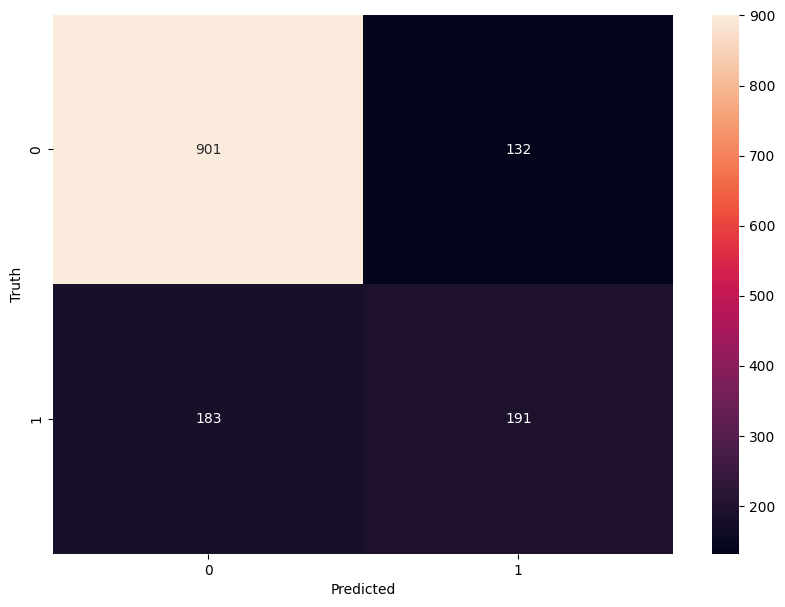

In [ ]:
cm = tf.math.confusion_matrix(labels= y_test, predictions= y_pred_after_convert)

plt.figure(figsize= (10, 7))
sns.heatmap(cm, annot= True, fmt='d') # fmt = 'd' để nó đưa về dạng số đếm không nó sẽ để dạng 1e + ... gì đó
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [220]:
y_test.shape

(1407,)

- Accuracy

In [222]:
total_predict = 901+191+132+183
accuracy = round((901+191) / (total_predict), 2)
accuracy

0.78

- Prediction for 0 class. Precision for customers who did not churn

In [231]:
res_class_0 = round(901/ (901+132), 2)
res_class_0

0.87

- Prediction for 1 class. Precision for customers who did churn

In [232]:
res_class_1 = round(191/ (191+183), 2)
res_class_1

0.51